In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.datasets import mnist

In [3]:
(X_train_all, y_train_all), (X_test_all, y_test_all) = mnist.load_data()

print(X_train_all.shape, y_train_all.shape)
print(X_test_all.shape, y_test_all.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


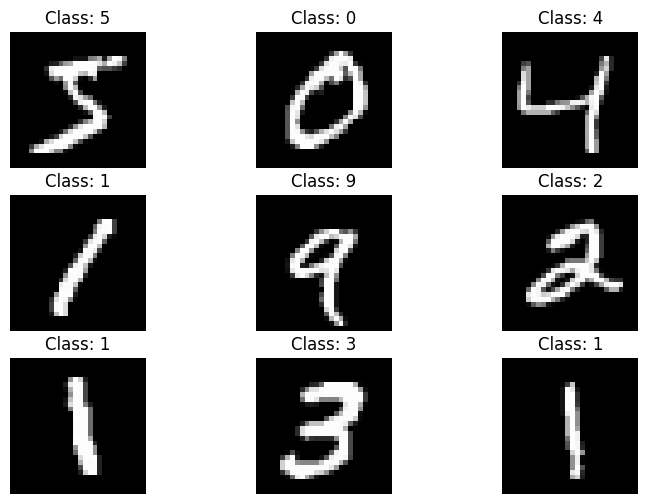

In [4]:
fig, ax = plt.subplots(3, 3, figsize = (9, 6))

for i in range(9):
    ax[i//3, i%3].imshow(X_train_all[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_all[i])
    
plt.show()

In [ ]:
X_train_all = X_train_all.reshape(X_train_all.shape[0], X_train_all.shape[1] * X_train_all.shape[2])
X_test_all = X_test_all.reshape(X_test_all.shape[0], X_test_all.shape[1] * X_test_all.shape[2])

print(X_train_all.shape)
print(X_test_all.shape)

(60000, 784)
(10000, 784)


In [28]:
X_train_all = X_train_all/255
X_test_all = X_test_all/255

In [29]:
y_train_all = pd.get_dummies(y_train_all).astype(int).to_numpy()
y_test_all = pd.get_dummies(y_test_all).astype(int).to_numpy()

- $D =$ número de features
- $K =$ número de classes
- $N =$ número de linhas do dataset

In [30]:
def add_column_of_ones(X):
    return np.hstack((np.ones((X.shape[0],1)), X))

Função softmax:
$$
H[k][i] = P(y^{(i)} = k | \mathbf{x}^{(i)}; \mathbf{w}) = \frac{e^{ \mathbf{w}^{(k) \; T} \mathbf{x}^{(i)}}}{\sum_{j=1}^{K} e^{ \mathbf{w}^{(j) \; T} \mathbf{x}^{(i)}}} = \frac{e^{c} \; e^{ (\mathbf{w}^{(k) \; T} \mathbf{x}^{(i)} \; - \; c)}} {e^{c} \; \sum_{j=1}^{K} e^{ (\mathbf{w}^{(j) \; T} \mathbf{x}^{(i)} \; - \; c)}} = \frac{e^{ (\mathbf{w}^{(k) \; T} \mathbf{x}^{(i)} \; - \; c)}} {\sum_{j=1}^{K} e^{ (\mathbf{w}^{(j) \; T} \mathbf{x}^{(i)} \; - \; c)}}
$$

In [31]:
def softmax(X, w):
    '''
    Arguments:
    X = (NxD) numpy matrix, dataset de treino
    w = (KxD) numpy matrix, pesos
    
    Returns:
    H = (KxN) numpy matrix, cada coluna representa a probabilidade da i-esima linha do X ser da classe k
    '''
    n = X.shape[0]
    k = w.shape[0]
    H = np.zeros((k, n))

    for i in range(n):
        #obtenção da constante
        c_vector = np.zeros(k)
        for j in range(k):
            c_vector[j] = (np.dot(X[i], w[j]))
            c = np.amax(c_vector)

        #cálculo da probabilidade H[k][i] 
        denominator = 0
        for j in range(k):
            expo = np.dot(X[i], w[j]) - c
            denominator += np.exp(expo)
            H[j][i] = np.exp(expo)
        H[:, i] = H[:, i] / denominator
    
    return H

Função de custo:
$$
J(\mathbf{w}) = -\frac{1}{N} \left[ \sum_{i=1}^{N} \sum_{k=1}^{K} \{ y^{(i)} == k\} \ln (H[k][i])                   \right]
$$

In [32]:
def cross_entropy_loss(w, X, y):
    '''
    Argumentos:
    X = (NxD) numpy matrix, dataset de treino
    y = (NxK) numpy matrix, output do dataset
    w = (KxD) numpy matrix, pesos
    
    Retorno:
    loss = (int), valor da função de custo
    '''
    H = softmax(X, w)
    n = X.shape[0]
    k = w.shape[0]
    loss = 0
    
    for i in range(n):
        for j in range(k):
            loss += (y[i][j] * H[j][i])
    loss = -loss / n

    return loss

Gradiente da função de custo:
$$
\nabla_{\mathbf{w}^{(k)}} 
J(\mathbf{w}) = 
-\sum_{i=1}^{N} \left[ 
\mathbf{x}^{(i)}  \left( \{ y^{(i)} == k\} - H[k][i] \right)
\right]
$$

In [33]:
def cross_entropy_gradient(X, y, w):
    '''
    Argumentos:
    X = (NxD) numpy matrix, dataset de treino
    y = (NxK) numpy matrix, output do dataset
    w = (KxD) numpy matrix, pesos
    
    Retorno:
    gradient = (KxD), gradiente de w para todas as k classes
    '''
    H = softmax(X, w)

    return -((y.T - H) @ X)

In [34]:
def train_softmax(X, y, w = None, learning_rate = 0.1, num_iterations = 1000, return_history = False):
    '''
    Argumentos:
    X = (NxD) numpy matrix, dataset de treino
    y = (NxK) numpy matrix, output do dataset
    w = (KxD) numpy matrix, pesos
    
    Retorno:
    w = (KxD) numpy matrix, 'pesos treinados' 
    '''
    X = add_column_of_ones(X)
    cost_history = []

    if w == None:
        w = np.random.normal(loc = 0, scale = 1, size = (y.shape[1], X.shape[1]))

    #Batch gradient descent
    for i in range(num_iterations):
        print('epoca = ', i)
        cost_history.append(cross_entropy_loss(w, X, y))
        
        gradient = cross_entropy_gradient(X, y, w)
        w = w - learning_rate * gradient

    cost_history.append(cross_entropy_loss(w, X, y))
    if return_history == True:
        return w, cost_history
    else:
        return w

In [35]:
def to_classlabel(z):
    return np.argmax(z)

epoca =  0
epoca =  1
epoca =  2
epoca =  3
epoca =  4
epoca =  5
epoca =  6
epoca =  7
epoca =  8
epoca =  9
epoca =  10
epoca =  11
epoca =  12
epoca =  13
epoca =  14
epoca =  15
epoca =  16
epoca =  17
epoca =  18
epoca =  19
epoca =  20
epoca =  21
epoca =  22
epoca =  23
epoca =  24
epoca =  25
epoca =  26
epoca =  27
epoca =  28
epoca =  29
epoca =  30
epoca =  31
epoca =  32
epoca =  33
epoca =  34
epoca =  35
epoca =  36
epoca =  37
epoca =  38
epoca =  39
epoca =  40
epoca =  41
epoca =  42
epoca =  43
epoca =  44
epoca =  45
epoca =  46
epoca =  47
epoca =  48
epoca =  49
epoca =  50
epoca =  51
epoca =  52
epoca =  53
epoca =  54
epoca =  55
epoca =  56
epoca =  57
epoca =  58
epoca =  59
epoca =  60
epoca =  61
epoca =  62
epoca =  63
epoca =  64
epoca =  65
epoca =  66
epoca =  67
epoca =  68
epoca =  69
epoca =  70
epoca =  71
epoca =  72
epoca =  73
epoca =  74
epoca =  75
epoca =  76
epoca =  77
epoca =  78
epoca =  79
epoca =  80
epoca =  81
epoca =  82
epoca =  83
ep

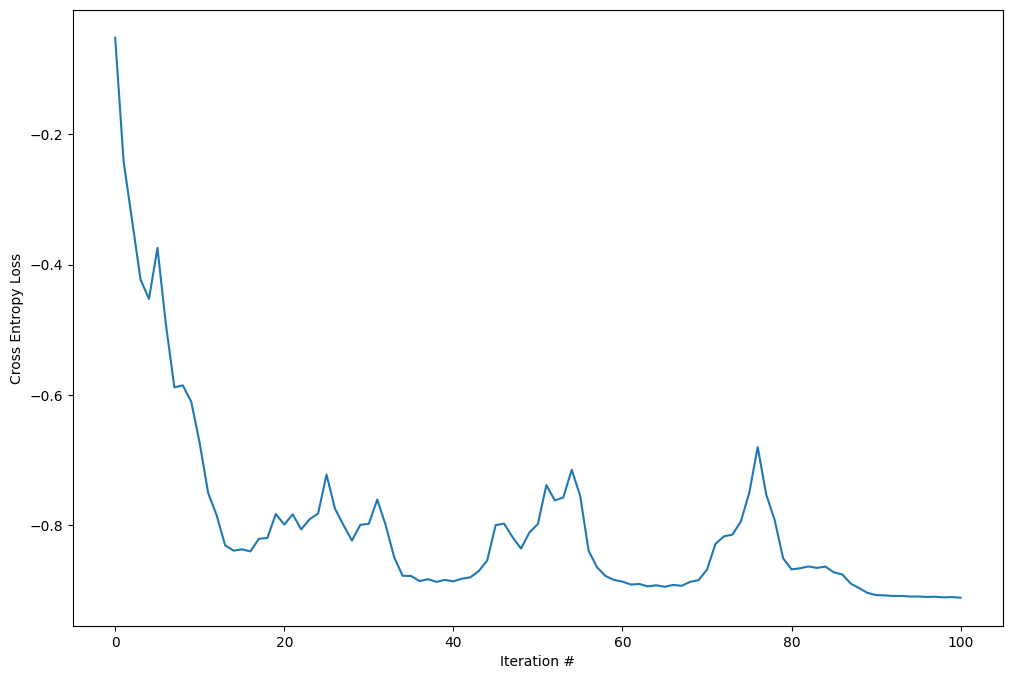

In [36]:
w_soft, loss = train_softmax(X_train_all, y_train_all, num_iterations=100 ,learning_rate=0.1, return_history=True)
print("\n\x1b[94mFinal loss:\n\x1b[0m", loss[-1])

plt.figure(figsize = (12, 8))
plt.plot(loss)
plt.xlabel('Iteration #')
plt.ylabel('Cross Entropy Loss')
plt.show()

In [37]:
X_test2 = add_column_of_ones(X_test_all)
y_pred = softmax(X_test2, w_soft)

print('\x1b[93mSum of columns of the predict probabilities\x1b[0m\n', y_pred.sum(axis=0))
print(y_pred.sum(axis=0).sum(axis=0))

Sum of columns of the predict probabilities
 [1. 1. 1. ... 1. 1. 1.]
10000.0


In [38]:
y_pred2 = y_pred.T
y_pred2.shape

(10000, 10)

In [39]:
y_pred3 = np.zeros(y_pred2.shape[0])
y_test2 = np.zeros(y_test_all.shape[0])
for i in range(y_pred2.shape[0]):
    y_pred3[i] = to_classlabel(y_pred2[i])
    y_test2[i] = to_classlabel(y_test_all[i])

In [40]:
print('\x1b[94mReal\x1b[0m')
print("'0':   ", np.count_nonzero(y_test2 == 0))
print("'1':   ", np.count_nonzero(y_test2 == 1))
print("'2':   ", np.count_nonzero(y_test2 == 2))
print("'3':   ", np.count_nonzero(y_test2 == 3))
print("'4':   ", np.count_nonzero(y_test2 == 4))
print("'5':   ", np.count_nonzero(y_test2 == 5))
print("'6':   ", np.count_nonzero(y_test2 == 6))
print("'7':   ", np.count_nonzero(y_test2 == 7))
print("'8':   ", np.count_nonzero(y_test2 == 8))
print("'9':   ", np.count_nonzero(y_test2 == 9))

print('\n\x1b[95mSoftmax\x1b[0m')
print("'0':   ", np.count_nonzero(y_pred3 == 0))
print("'1':   ", np.count_nonzero(y_pred3 == 1))
print("'2':   ", np.count_nonzero(y_pred3 == 2))
print("'3':   ", np.count_nonzero(y_pred3 == 3))
print("'4':   ", np.count_nonzero(y_pred3 == 4))
print("'5':   ", np.count_nonzero(y_pred3 == 5))
print("'6':   ", np.count_nonzero(y_pred3 == 6))
print("'7':   ", np.count_nonzero(y_pred3 == 7))
print("'8':   ", np.count_nonzero(y_pred3 == 8))
print("'9':   ", np.count_nonzero(y_pred3 == 9))

print('\n\x1b[92mAcuraccy: \x1b[0m', round(metrics.accuracy_score(y_test2, y_pred3)*100, 2))

Real
'0':    980
'1':    1135
'2':    1032
'3':    1010
'4':    982
'5':    892
'6':    958
'7':    1028
'8':    974
'9':    1009

Softmax
'0':    1005
'1':    1133
'2':    1006
'3':    1025
'4':    1001
'5':    851
'6':    950
'7':    1032
'8':    1032
'9':    965

Acuraccy:  91.27
